<a href="https://colab.research.google.com/github/abdulilahalqasem/NLP-Amazon-Reviews/blob/main/Code/NLP_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **#1 Import Libraries**

In [1]:
#Importing all the libraries needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import string
import nltk # Natural Language tool kit
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

## **#2 Load Dataset**

In [2]:
#Load the dataset.
dataset_url = 'https://raw.githubusercontent.com/abdulilahalqasem/NLP-Amazon-Reviews/main/Dataset/amazon_reviews.csv'
amazon_df = pd.read_csv(dataset_url)

In [3]:
amazon_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


## **#3 Exploratory Data Analysis (EDA)**

In [4]:
#Shows information about the dataset, such as the number of non-null entries, data types, and memory usage.
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
#Provides statistical summary information about numeric columns in the dataset.
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<Axes: xlabel='rating', ylabel='count'>

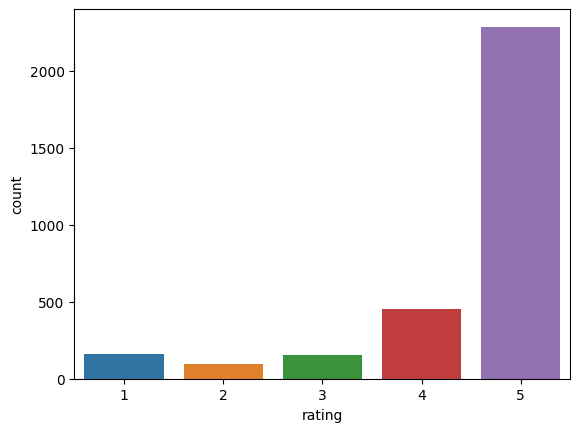

In [10]:
#Plots Countplot for the ratng column of the DataFrame.
sns.countplot(x = amazon_df['rating'], label = "Count")

In [11]:
#Creating new coulmn 'length' for amazong reviews length.
amazon_df['length'] = amazon_df['verified_reviews'].apply(len)

In [12]:
amazon_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [13]:
amazon_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<Axes: ylabel='Frequency'>

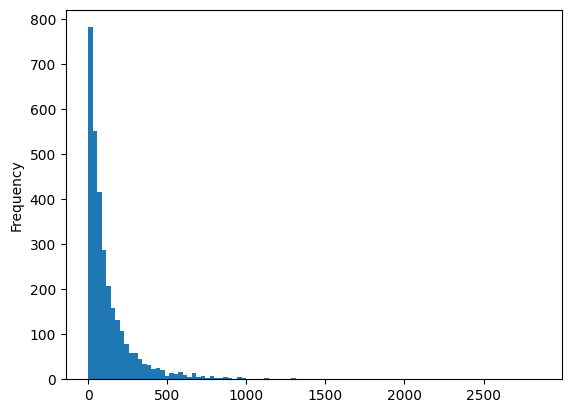

In [14]:
# Plot the histogram of the length column
amazon_df['length'].plot(bins=100, kind='hist')

<Axes: xlabel='feedback', ylabel='count'>

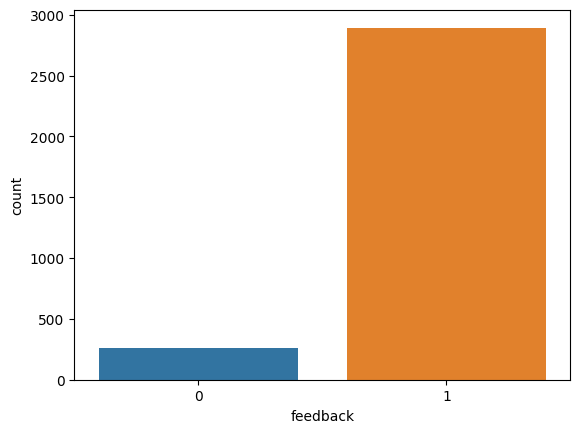

In [15]:
#Plots Countplot for the feedback column of the DataFrame.
sns.countplot(x = amazon_df['feedback'], label = "Count")

In [33]:
#Creating postive data frame to use WordCloud.
positive = amazon_df[amazon_df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [34]:
#Creating negative data frame to use WordCloud.
negative = amazon_df[amazon_df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [36]:
#Combining all the reviews in one string.
sentences = amazon_df['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)

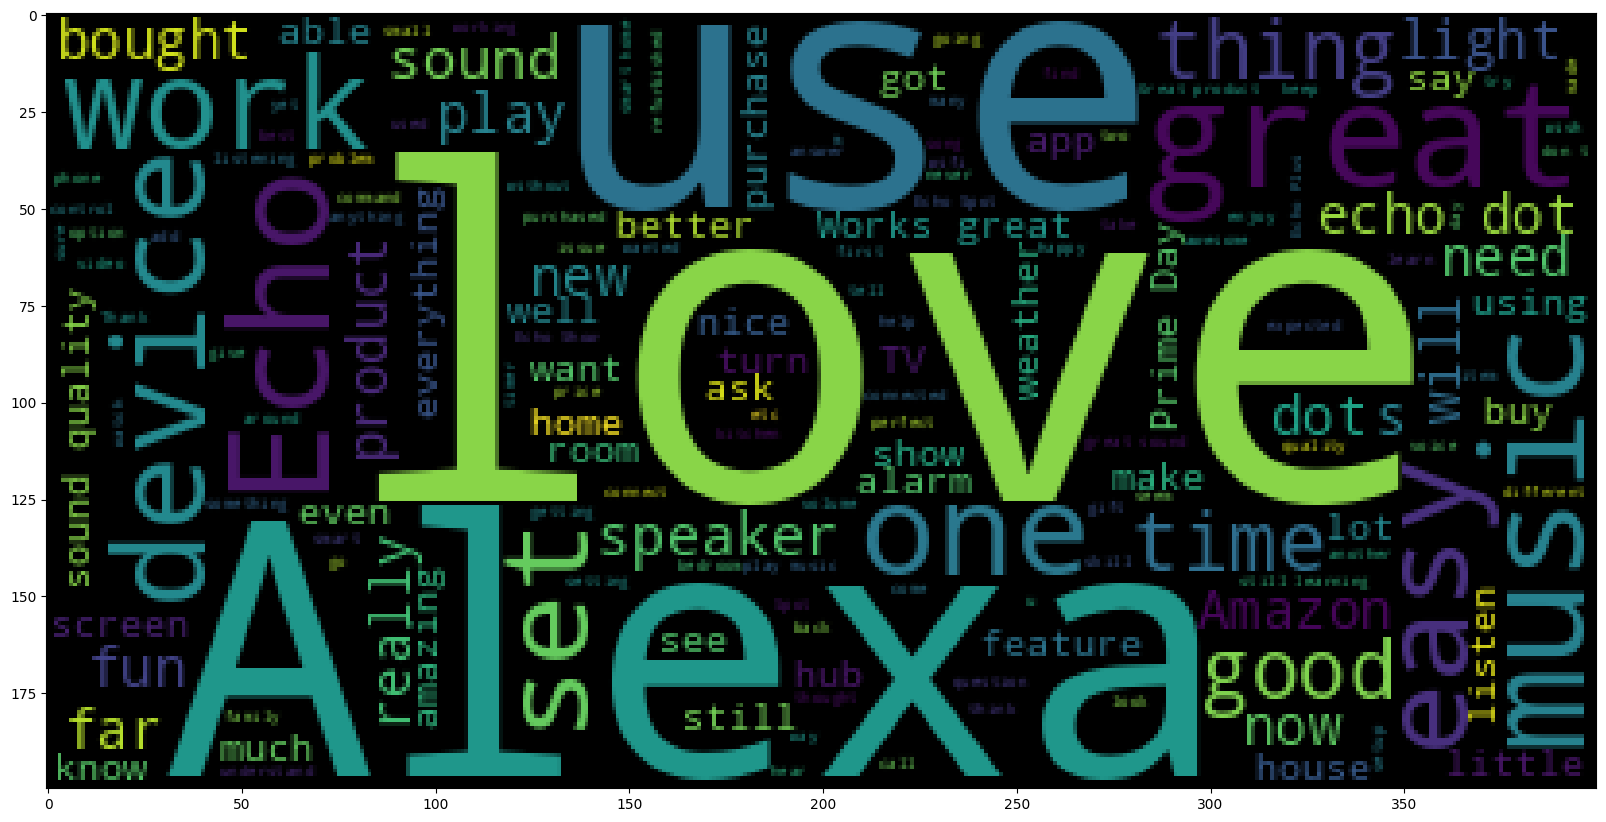

In [44]:
#Plot the WorldCloud for all the reviews.
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

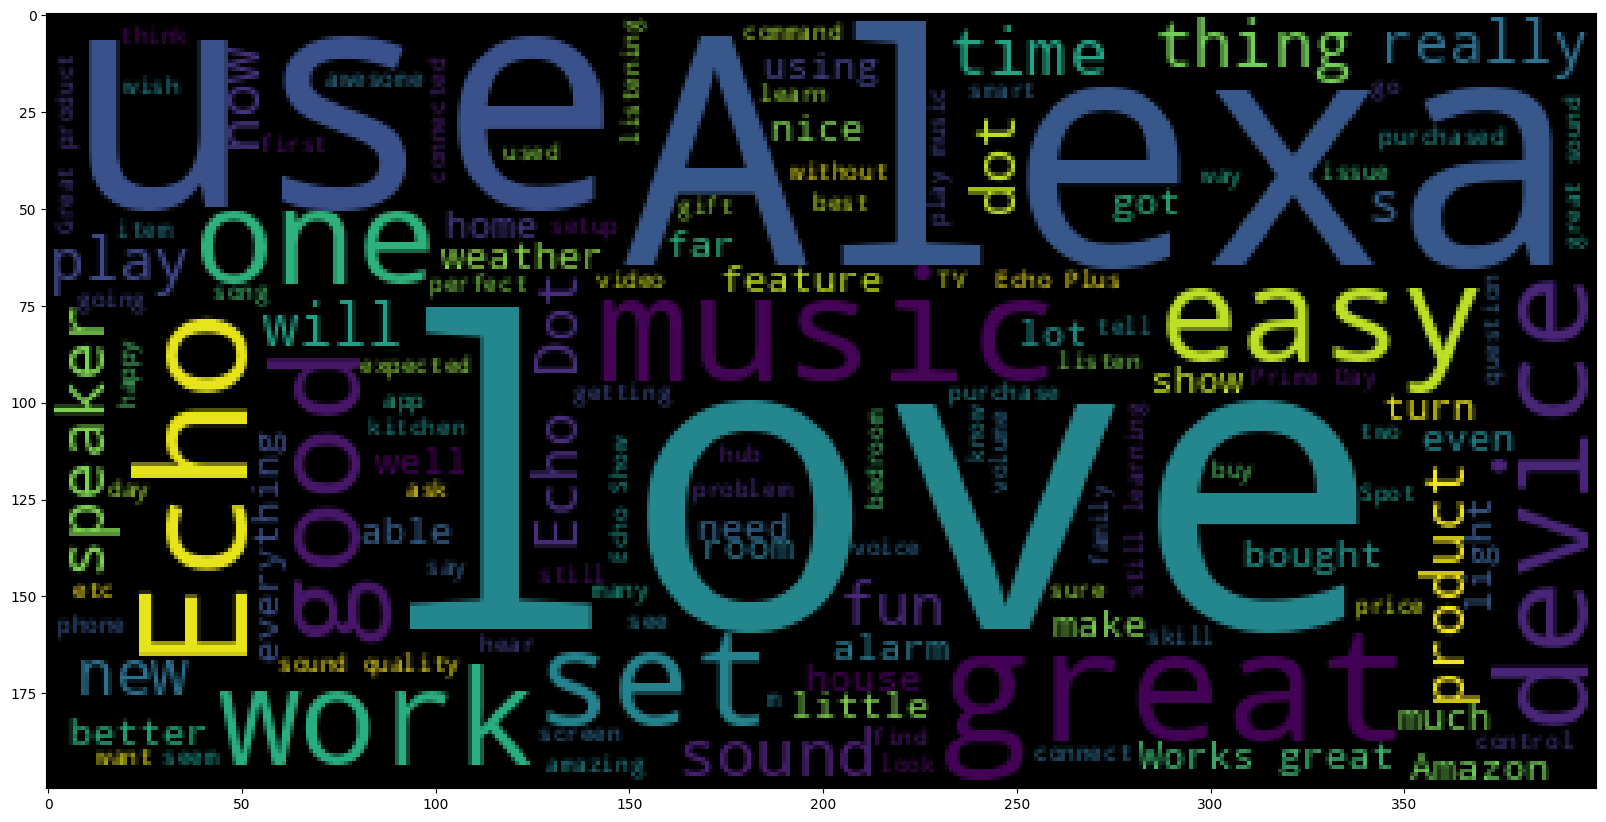

In [45]:
#Plot the WorldCloud for all the positive reviews.
positive_list = positive['verified_reviews'].tolist()

positive_sentences_as_one_string = " ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))

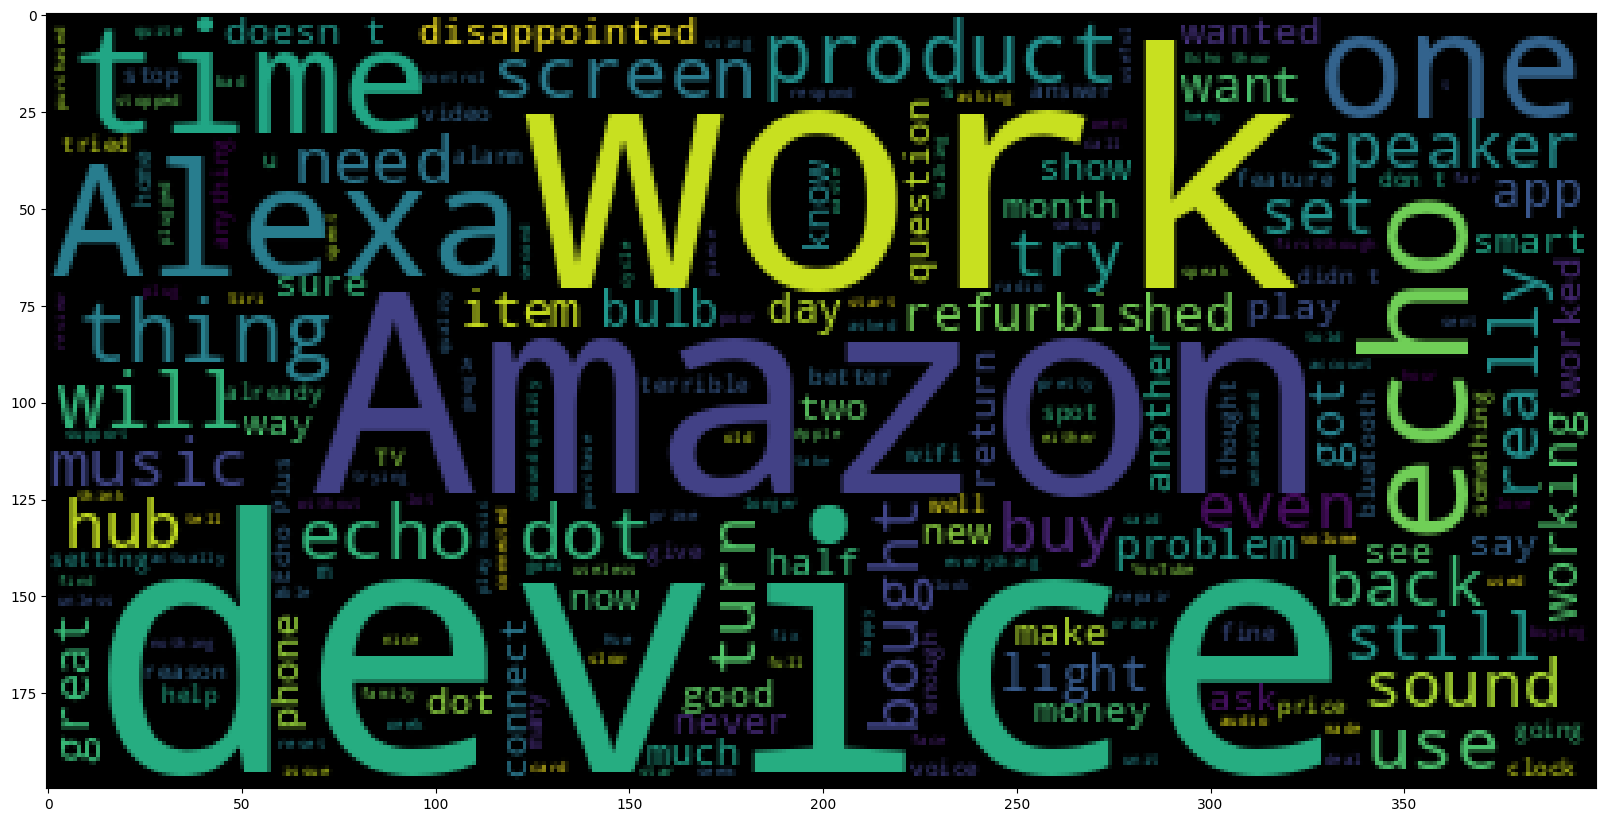

In [46]:
#Plot the WorldCloud for all the negative reviews.
negative_list = negative['verified_reviews'].tolist()

negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [47]:
#Importing and calling all the Punctuations.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
#Importing and calling all the stop words in english.
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
# define a pipeline to clean up all the messages.
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords.

def message_cleaning(message):
    message_punc_removed = [char for char in message if char not in string.punctuation]
    message_punc_removed_join = ''.join(message_punc_removed)
    message_punc_removed_join_clean = [word for word in message_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return message_punc_removed_join_clean

In [51]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [52]:
#Checking the shape.
reviews_countvectorizer.shape

(3150, 5211)

## **#4 Model**

In [53]:
#Creating feature matrix X and target vector y from the transformed data.
X = pd.DataFrame(reviews_countvectorizer.toarray())
y = amazon_df['feedback']

In [54]:
X.shape

(3150, 5211)

In [55]:
y.shape

(3150,)

In [56]:
#train_test_split is used to split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
#A Multinomial Naive Bayes classifier is created and trained on the training data.
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

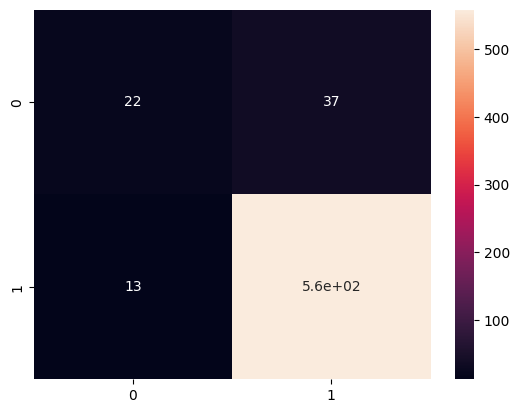

In [58]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [59]:
#A confusion matrix and classification report are generated to evaluate the model's performance.
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.63      0.37      0.47        59
           1       0.94      0.98      0.96       571

    accuracy                           0.92       630
   macro avg       0.78      0.68      0.71       630
weighted avg       0.91      0.92      0.91       630



              precision    recall  f1-score   support

           0       0.83      0.32      0.46        59
           1       0.93      0.99      0.96       571

    accuracy                           0.93       630
   macro avg       0.88      0.66      0.71       630
weighted avg       0.92      0.93      0.92       630



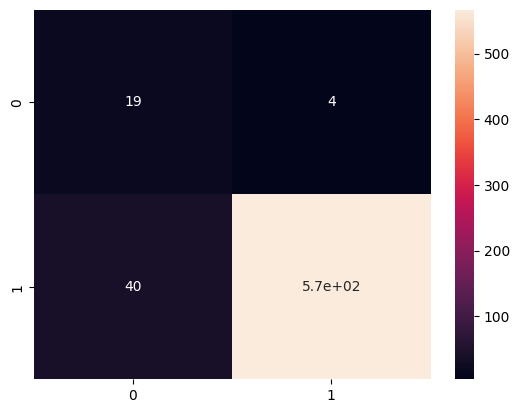

In [62]:
# Importing the LogisticRegression class from the scikit-learn library, creating a model, and fitting it with the training data.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test data using the trained model.
y_pred = model.predict(X_test)

# Calculating the confusion matrix to assess the model's performance and visualizing it as a heatmap with annotations.
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

# Printing the classification report to provide detailed evaluation metrics (e.g., precision, recall, F1-score) on the test data.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.15      0.26        59
           1       0.92      1.00      0.96       571

    accuracy                           0.92       630
   macro avg       0.87      0.57      0.61       630
weighted avg       0.91      0.92      0.89       630



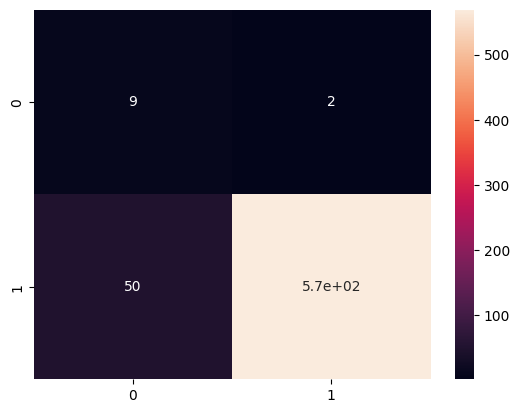

In [63]:
# Importing the GradientBoostingClassifier from scikit-learn, creating a model, and fitting it with the training data.
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Making predictions on the test data using the trained gradient boosting classifier.
y_pred = model.predict(X_test)

# Calculating the confusion matrix to evaluate the model's performance and visualizing it as a heatmap with annotations.
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

# Printing the classification report to provide detailed classification metrics (e.g., precision, recall, F1-score) on the test data.
print(classification_report(y_test, y_pred))